In [1]:
%pylab inline
%matplotlib inline

import sys
import os
import time
import codecs
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pickle


sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")

import emolex
import paths
import tokenizer
import useful_methods as my_methods
import train_datas

Populating the interactive namespace from numpy and matplotlib


## The elbow method

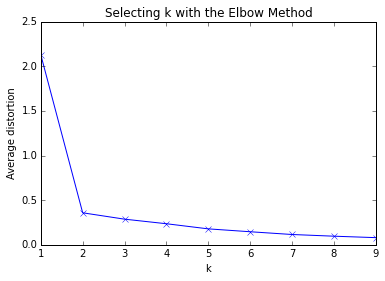

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(
        sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

## Image quantization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

In [4]:
########################
# Step 1: read and  atten the image
os.chdir("/Users/Bya/Dropbox/Photos/")

original_img = np.array(mh.imread('bya1.jpg'), dtype=np. float64) / 255

original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)

image_flattened = np.reshape(original_img, (width * height, depth))

In [5]:
########################
# Step 2:  K-Means to create 64 clusters
#          from a sample of 1,000 randomly selected colors

image_array_sample = shuffle(image_flattened, random_state=0)[:1000]

estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=64, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [6]:
########################
# Step 3:  predict the cluster assignment for each of the pixels in the original image

cluster_assignments = estimator.predict(image_flattened)

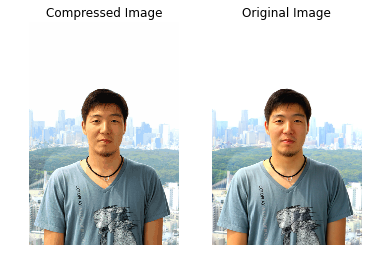

In [7]:
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))

label_idx = 0

for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()